A biblioteca face-recongition tem metodos para reconhecer rostos na imagem e também reconhecer se este rosto é semelhante a um rosto dado como conhecido.
Deve rodar com GPU

In [107]:
!pip install face-recognition


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [108]:
import face_recognition
import cv2
from google.colab.patches import cv2_imshow
import PIL
from PIL import Image, ImageDraw

Contando numero de pessoas

In [109]:
# load the images as a numpy array
#mage = face_recognition.load_image_file('/content/friends.jpg')
image = cv2.imread('/content/friends.jpg')
imagem = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
# get the locations of the faces in image
face_locations = face_recognition.face_locations(image)

# Array of coords of each face top-right e bottom-left
print(face_locations)

# Print quantity person in image
print(f'Existem {len(face_locations)} pessoas nessa imagem')



[(182, 83, 234, 31), (44, 227, 95, 175), (191, 335, 253, 273), (170, 398, 232, 335), (66, 301, 129, 239), (113, 158, 164, 106)]
Existem 6 pessoas nessa imagem


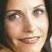

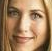

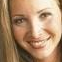

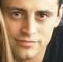

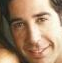

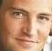

In [110]:
for face_location in face_locations:
    top, right, bottom, left = face_location

    face_image = image[top:bottom, left:right]
    cv2_imshow(face_image)


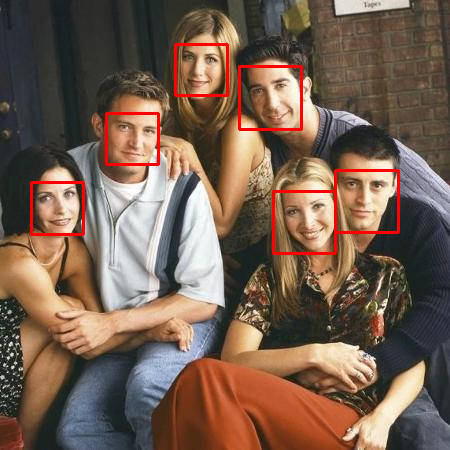

In [111]:
for face_location in face_locations:
    top, right, bottom, left = face_location
    image = cv2.rectangle(image, (right,top),(left,bottom) ,(0,0,255),2)    
cv2_imshow(image)

In [112]:
imagem= face_recognition.load_image_file('/content/know/monica1.jpg')
# face_encodings encode an image at 128 dimentions
face_encoding = face_recognition.face_encodings(imagem)[0]

unknown_image = face_recognition.load_image_file('/content/know/monica2.jpg')

unknown_face_encoding = face_recognition.face_encodings(unknown_image)[0]

# Compare faces
results = face_recognition.compare_faces(
    [face_encoding], unknown_face_encoding)

if results[0]:
    print('Essa é a Monica Geller')
else:
    print('Não parece ser a Monica Geller')


Essa é a Monica Geller


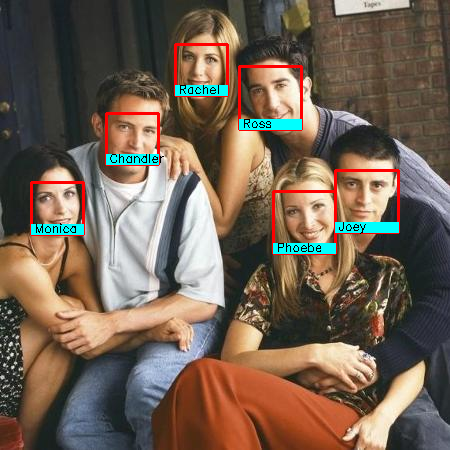

In [114]:
# Load test image to find faces in
test_image = cv2.imread('/content/friends.jpg')
# Find faces in test image
face_locations = face_recognition.face_locations(test_image)
face_encodings = face_recognition.face_encodings(test_image, face_locations)



# Loop through faces in test image
for(top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
  name = "Unknown Person"
 
  # If match
  if True in matches:
    first_match_index = matches.index(True)
    name = known_face_names[first_match_index]
 
    test_image = cv2.rectangle(test_image, (right,top),(left,bottom) ,(0,0,255),2)  

    cv2.rectangle(test_image,(left,bottom -  10), (right, bottom), (255,255,0), -1)
    cv2.putText(test_image,name,(left + 3, bottom -  2), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,0,0), 1)



# Display image
cv2_imshow(test_image)

# Save image


In [92]:
image_of_chandler = face_recognition.load_image_file('/content/know/chandler1.jpg')
chandler_face_encoding = face_recognition.face_encodings(image_of_chandler)[0]

image_of_joey = face_recognition.load_image_file('/content/know/joey1.jpg')
joey_face_encoding = face_recognition.face_encodings(image_of_joey)[0]

image_of_monica = face_recognition.load_image_file('/content/know/monica1.jpg')
monica_face_encoding = face_recognition.face_encodings(image_of_monica)[0]

image_of_phoebe = face_recognition.load_image_file('/content/know/phoebe1.jpg')
phoebe_face_encoding = face_recognition.face_encodings(image_of_phoebe)[0]


image_of_rachel = face_recognition.load_image_file('/content/know/rachel1.jpg')
rachel_face_encoding = face_recognition.face_encodings(image_of_rachel)[0]

image_of_ross = face_recognition.load_image_file('/content/know/ross1.jpg')
ross_face_encoding = face_recognition.face_encodings(image_of_ross)[0]

#  Create arrays of encodings and names
known_face_encodings = [
  chandler_face_encoding,
  joey_face_encoding,
  monica_face_encoding,
  phoebe_face_encoding,
  rachel_face_encoding,
  ross_face_encoding
]

known_face_names = [
   "Chandler",
  "Joey",
  "Monica",
  "Phoebe",
  "Rachel",
  "Ross"
]

# Load test image to find faces in
test_image = face_recognition.load_image_file('/content/friends.jpg')

# Find faces in test image
face_locations = face_recognition.face_locations(test_image)
face_encodings = face_recognition.face_encodings(test_image, face_locations)

# Convert to PIL format
pil_image = Image.fromarray(test_image)

# Create a ImageDraw instance
draw = ImageDraw.Draw(pil_image)

# Loop through faces in test image
for(top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
  matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
  name = "Unknown Person"
 
  # If match
  if True in matches:
    first_match_index = matches.index(True)
    name = known_face_names[first_match_index]
  
  # Draw box
  draw.rectangle(((left, top), (right, bottom)), outline=(255,255,0))

  # Draw label
  text_width, text_height = draw.textsize(name)
  draw.rectangle(((left,bottom - text_height - 10), (right, bottom)), fill=(255,255,0), outline=(255,255,0))
  draw.text((left + 6, bottom - text_height - 5), name, fill=(0,0,0))

del draw

# Display image
pil_image.show()

# Save image
pil_image.save('identified.jpg')